<a href="https://colab.research.google.com/github/San-kalp/AI-Technique-for-Classification-of-Brain-Tumor-MRI-Images-for-General-Physicians/blob/main/Brain_Tumor_Classification_EDI_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

# New section

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

 94% 139M/149M [00:04<00:00, 53.2MB/s]
100% 149M/149M [00:04<00:00, 37.8MB/s]


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import ipywidgets as widgets

In [ ]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_dir = ('/content/Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

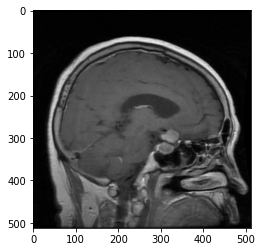

In [ ]:
plt.imshow(img_array);

In [ ]:
# The image shape.
img_array.shape

(512, 512, 3)

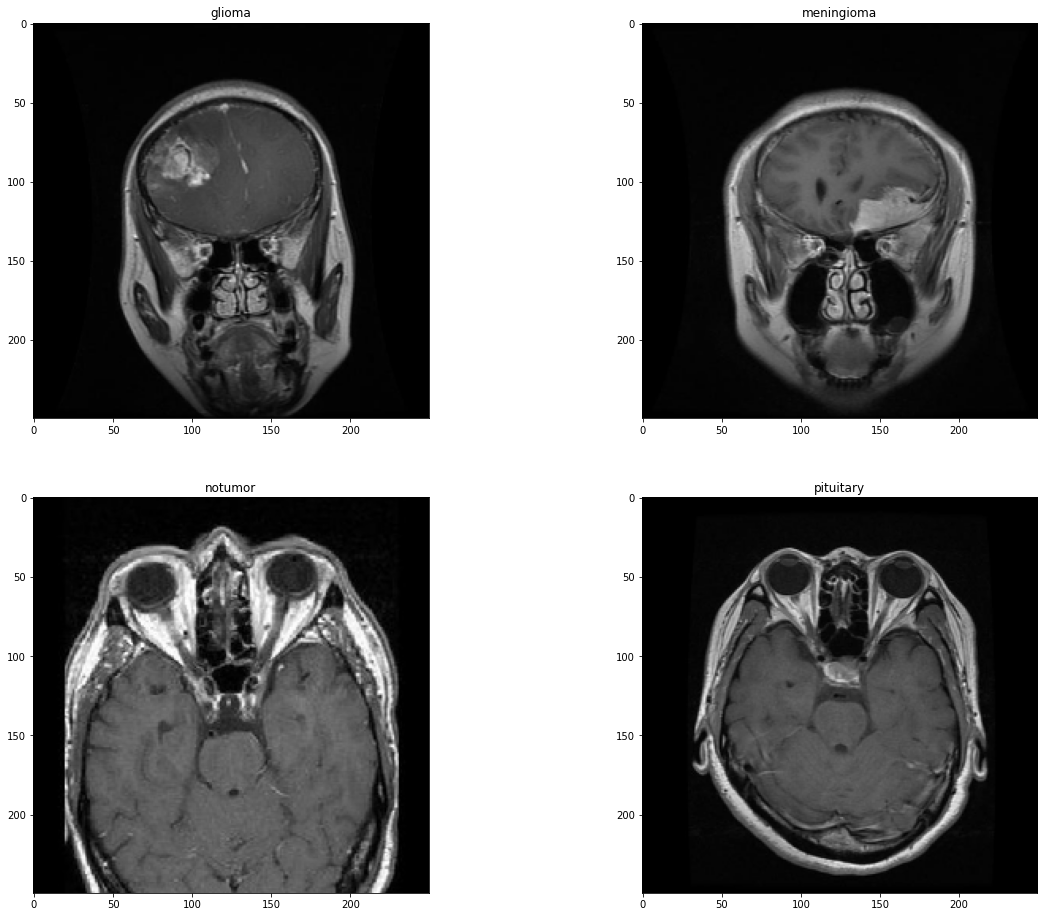

In [ ]:
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])

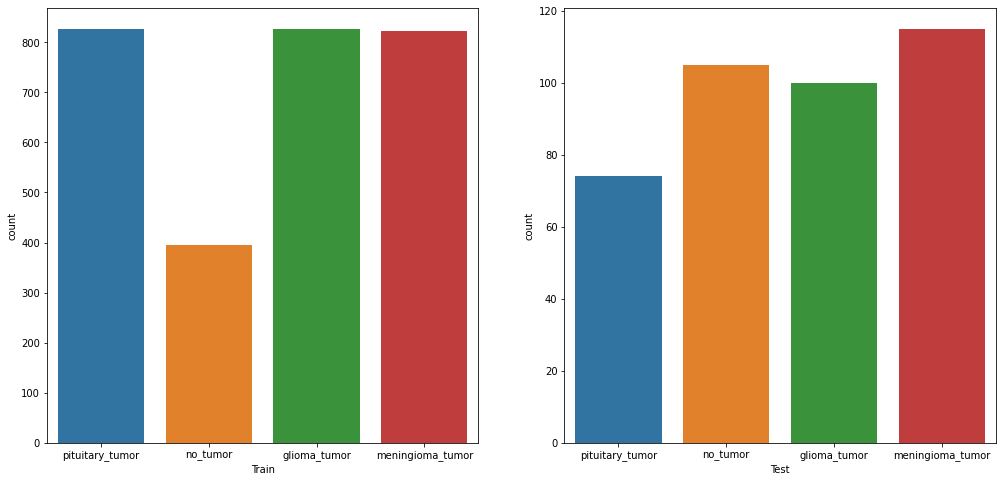

In [ ]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [ ]:
model1 = Sequential()

# Convolutional layer 1
model1.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(units= 252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('/content/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


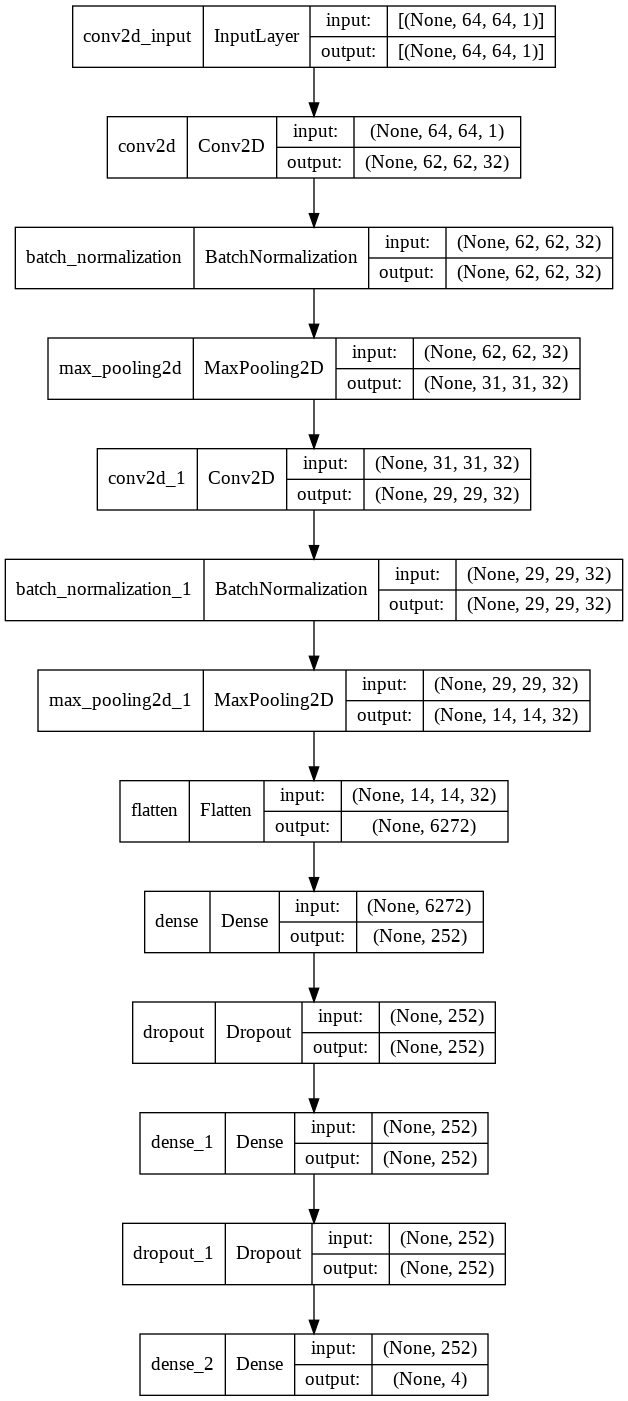

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model1, show_shapes=True)

In [ ]:
model1_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model1_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model1_mcp = ModelCheckpoint(filepath = 'model1_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fiting the model.
history1 = model1.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model1_es, model1_rlr, model1_mcp])

Epoch 1/100
178/178 [==============================] - ETA: 0s - loss: 0.7773 - categorical_accuracy: 0.7350
Epoch 00001: val_categorical_accuracy improved from -inf to 0.23281, saving model to model1_weights.h5
178/178 [==============================] - 28s 107ms/step - loss: 0.7773 - categorical_accuracy: 0.7350 - val_loss: 7.7376 - val_categorical_accuracy: 0.2328 - lr: 0.0010
Epoch 2/100
178/178 [==============================] - ETA: 0s - loss: 0.4386 - categorical_accuracy: 0.8326
Epoch 00002: val_categorical_accuracy improved from 0.23281 to 0.54219, saving model to model1_weights.h5
178/178 [==============================] - 19s 105ms/step - loss: 0.4386 - categorical_accuracy: 0.8326 - val_loss: 1.4060 - val_categorical_accuracy: 0.5422 - lr: 0.0010
Epoch 3/100
178/178 [==============================] - ETA: 0s - loss: 0.3437 - categorical_accuracy: 0.8680
Epoch 00003: val_categorical_accuracy improved from 0.54219 to 0.72656, saving model to model1_weights.h5
178/178 [=======

In [ ]:
model1.evaluate(test)

41/41 [==============================] - 3s 76ms/step - loss: 0.0664 - categorical_accuracy: 0.9847


[0.0663522332906723, 0.9847444891929626]

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                        

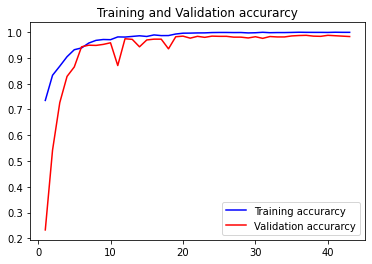

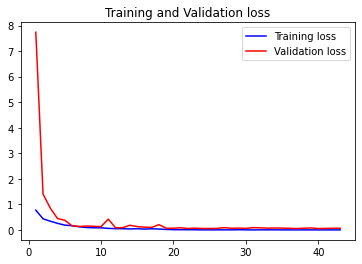

In [ ]:
acc = history1.history['categorical_accuracy']
val_acc = history1.history['val_categorical_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import random

In [ ]:
test_dir = '/content/Testing'
test_paths = []
for label in os.listdir(test_dir):
    for file in os.listdir(test_dir+'/'+label):
        test_paths.append(test_dir+'/'+label+'/'+file)
random.shuffle(test_paths)
# show an example of the list
print(test_paths[0])

/content/Testing/meningioma/Te-me_0039.jpg


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
def open_images(paths):
    '''
    Opens a batch of images, given the image path(s) as a list
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(64,64), color_mode='grayscale')
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

Predicted: glioma
Actual: glioma


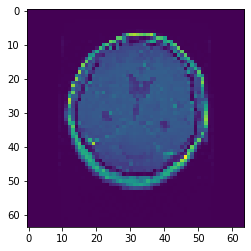

In [ ]:
i = random.randint(0,len(test_paths))
images = open_images([test_paths[i]])
predicted = model1.predict(images)[0]
predicted = np.argmax(predicted)
predicted = categories[predicted]
label = test_paths[i].split('/')[-2]
plt.imshow(images[0])
print('Predicted:', predicted)
print('Actual:', label)

In [ ]:
def predict(i):
      images = open_images([test_paths[i]])
      predicted = model1.predict(images)[0]
      predicted = np.argmax(predicted)
      predicted = categories[predicted]
      label = test_paths[i].split('/')[-2]
      plt.imshow(images[0], cmap='gray')
      print('Predicted:', predicted)
      print('Actual:', label)

Predicted: notumor
Actual: notumor


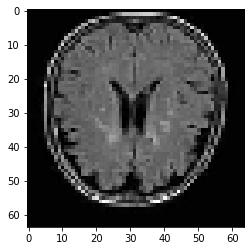

In [ ]:
i = random.randint(0,len(test_paths))
predict(i)

Predicted: notumor
Actual: notumor


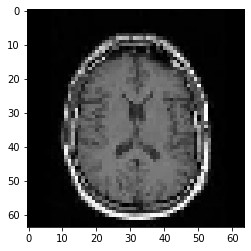

In [ ]:
i = random.randint(0,len(test_paths))
predict(i)

In [ ]:
w_img = []
for i in test_paths:
    images = open_images([i])
    predicted = model1.predict(images)[0]
    predicted = np.argmax(predicted)
    predicted = categories[predicted]
    label = i.split('/')[-2]
    if(predicted!=label):
        w_img.append(i)

Predicted: meningioma
Actual: glioma


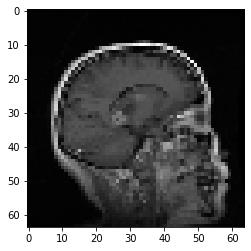

In [ ]:
i = random.randint(0,len(w_img))
images = open_images([w_img[i]])
predicted = model1.predict(images)[0]
predicted = np.argmax(predicted)
predicted = categories[predicted]
label = w_img[i].split('/')[-2]
plt.imshow(images[0], cmap='gray')
print('Predicted:', predicted)
print('Actual:', label)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred = []
actual = []
for i in test_paths:
    images = open_images([i])
    predicted = model1.predict(images)[0]
    predicted = np.argmax(predicted)
    predicted = categories[predicted]
    pred.append(predicted)
    label = i.split('/')[-2]
    actual.append(label)

In [ ]:
print(classification_report(actual, pred, target_names=categories))

              precision    recall  f1-score   support

      glioma       1.00      0.96      0.98       300
  meningioma       0.96      0.97      0.97       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.99      0.99      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(categories)
confusion_matrix(actual, pred, labels=categories)

['glioma', 'meningioma', 'notumor', 'pituitary']


array([[289,  11,   0,   0],
       [  1, 298,   3,   4],
       [  0,   0, 405,   0],
       [  0,   2,   0, 298]])

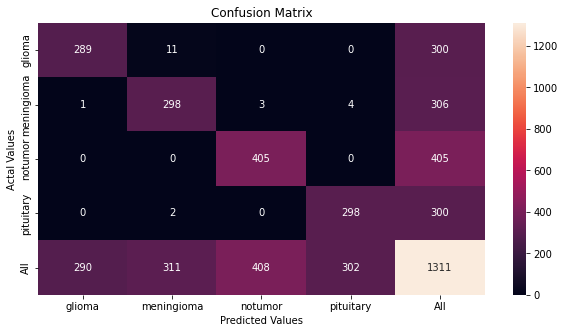

In [ ]:
data = {'y_Actual':    actual,
        'y_Predicted': pred}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix1 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix1, fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()